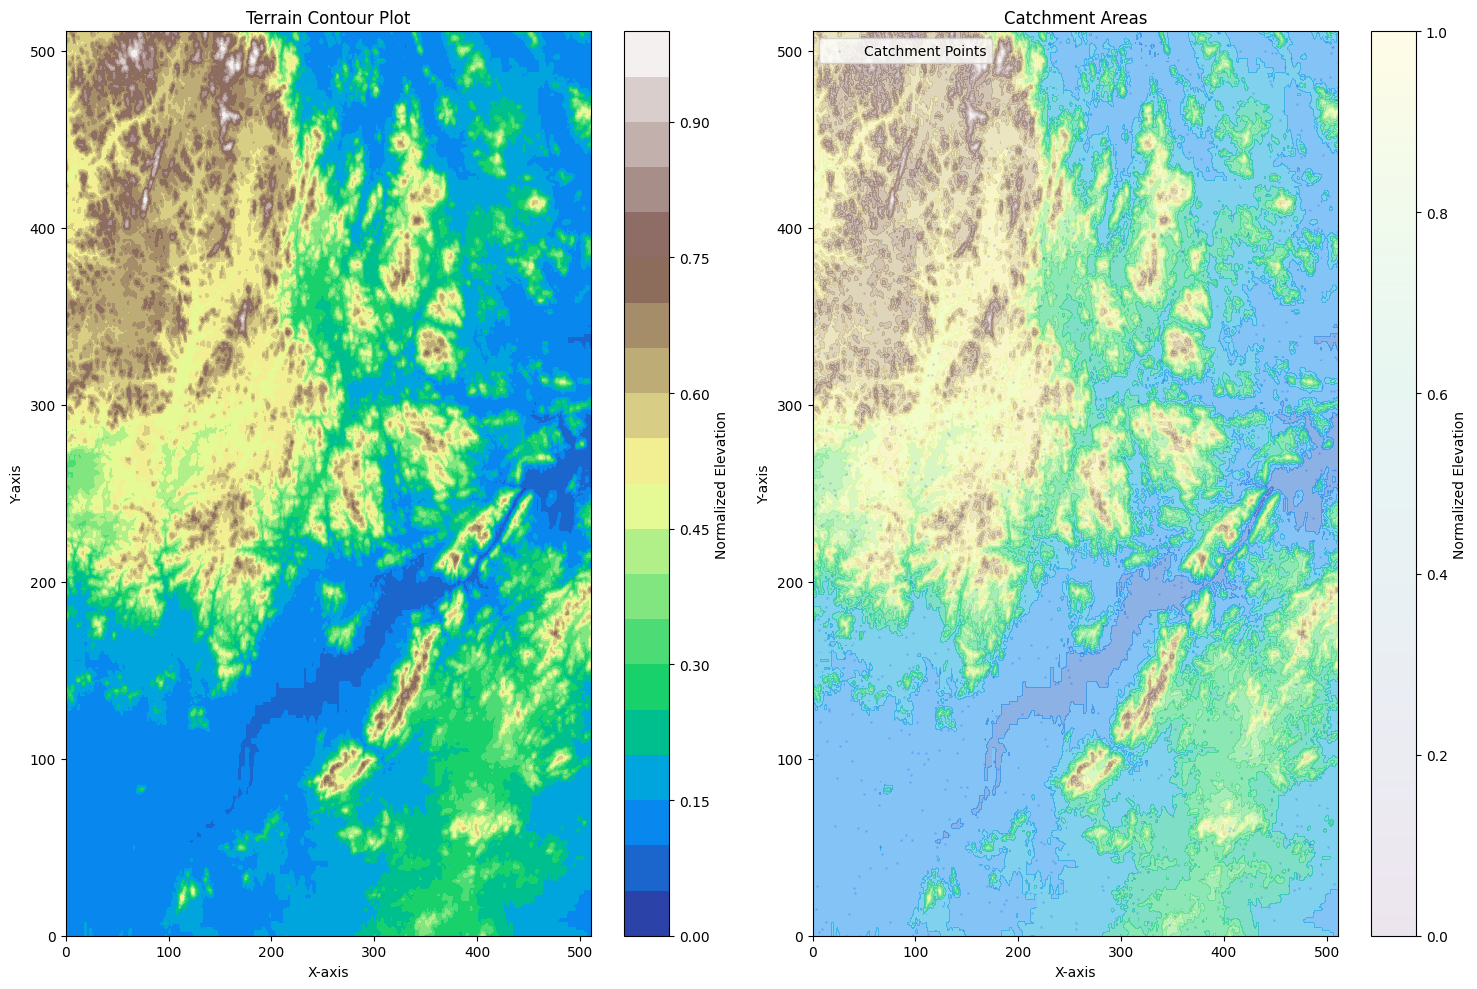

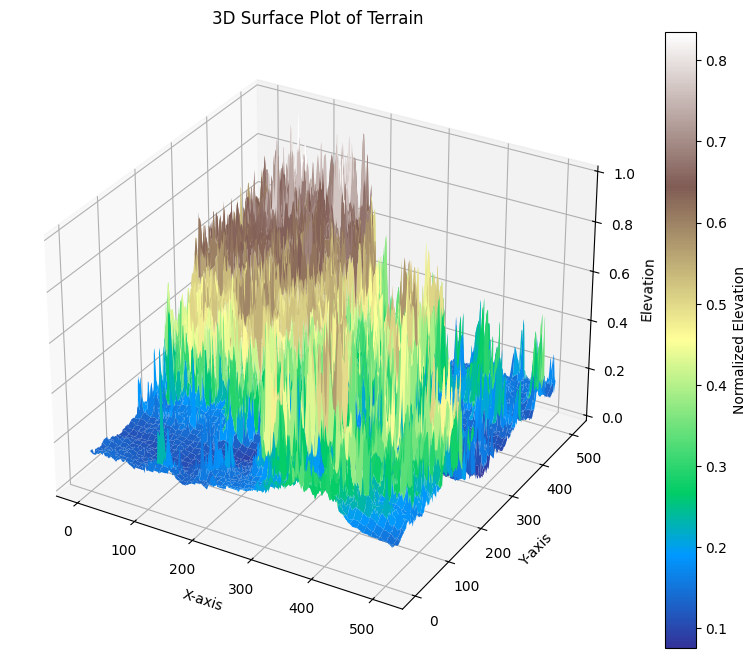

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_and_normalize_dem(image_path):
    image = Image.open(image_path).convert('L')
    dem_data = np.array(image) / 255.0
    return dem_data

def find_catchment(dem_data, x_start, y_start, learning_rate=0.1, tol=1e-3, max_iter=100):
    num_rows, num_cols = dem_data.shape
    x, y = x_start, y_start
    
    for _ in range(max_iter):
        # Calculate gradients
        grad_y, grad_x = np.gradient(dem_data)
        grad_x_value = grad_x[int(y), int(x)]
        grad_y_value = grad_y[int(y), int(x)]
        
        # Update position
        x_new = x - learning_rate * grad_x_value
        y_new = y - learning_rate * grad_y_value
        
        # Clip to bounds
        x_new = np.clip(x_new, 0, num_cols - 1)
        y_new = np.clip(y_new, 0, num_rows - 1)
        
        # Check convergence
        if abs(x_new - x) < tol and abs(y_new - y) < tol:
            break
            
        x, y = x_new, y_new
    
    return int(x), int(y)

def analyze_dem_catchments(image_path, num_points=1000):
    dem_data = load_and_normalize_dem(image_path)
    
    np.random.seed(42)
    points = []
    catchments = []
    
    for _ in range(num_points):
        x_start = np.random.randint(0, dem_data.shape[1])
        y_start = np.random.randint(0, dem_data.shape[0])
        x_min, y_min = find_catchment(dem_data, x_start, y_start)
        points.append((x_start, y_start))
        catchments.append((x_min, y_min))
    
    return dem_data, points, catchments

def plot_results(dem_data, points, catchments):
    plt.figure(figsize=(15, 10))
    
    # Plot terrain
    plt.subplot(121)
    plt.contourf(dem_data, levels=20, cmap=plt.cm.terrain)
    plt.colorbar(label='Normalized Elevation')
    plt.title('Terrain Contour Plot')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    
    # Plot catchments
    plt.subplot(122)
    plt.contourf(dem_data, levels=20, cmap=plt.cm.terrain, alpha=0.5)
    catchment_points = np.array(catchments)
    plt.scatter(catchment_points[:, 0], catchment_points[:, 1], 
               c='blue', s=1, alpha=0.1, label='Catchment Points')
    plt.colorbar(label='Normalized Elevation')
    plt.title('Catchment Areas')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_3d_surface(dem_data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    y, x = np.mgrid[0:dem_data.shape[0], 0:dem_data.shape[1]]
    
    surf = ax.plot_surface(x, y, dem_data, cmap=plt.cm.terrain)
    fig.colorbar(surf, label='Normalized Elevation')
    
    ax.set_title('3D Surface Plot of Terrain')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Elevation')
    
    plt.show()


image_path = 'terrain.jpeg'


dem_data, points, catchments = analyze_dem_catchments(image_path)

plot_results(dem_data, points, catchments)

plot_3d_surface(dem_data)